In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
pd.set_option('display.max_column', None)

In [8]:
data=pd.read_csv("C:/Users/abidm/Desktop/pers/reg/glassdoor_jobs.csv")

In [83]:
df=data.copy()

(956, 15)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1


Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

<AxesSubplot:ylabel='None'>

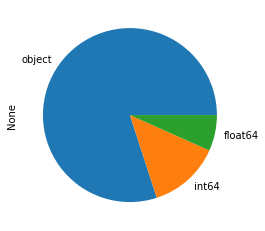

In [39]:
display(df.shape)
display(df.head(3))
display(df.dtypes)
df.dtypes.value_counts().plot.pie()

In [94]:
df=df[df['Salary Estimate']!='-1']
df.shape

(742, 15)

In [139]:
df['hourly']=df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0 )
df['employer_provided']=df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0 )

In [96]:
df['Salary Estimate'].apply(lambda x: x.split('(')[0] )#this is a serie
salary=df['Salary Estimate'].apply(lambda x: x.split('(')[0] )

In [101]:
# display(salary[1])
# salary[1].replace('K','').replace('$','')
min_kd=salary.apply(lambda x : x.replace('K','').replace('$','') )
min_kd

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [156]:
min_hr=min_kd.apply(lambda x : x.lower().replace('per hour','').replace('employer provided salary:','') )

In [163]:
df['min_salary']=min_hr.apply(lambda x: int(x.split('-')[0]))
df['max_salary']=min_hr.apply(lambda x: int(x.split('-')[1]))
df['avg_salary']=(df['min_salary']+df['max_salary'])/2
df['company_txt']=df.apply(lambda x : x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3],axis=1)
df['job_state']=df['Location'].apply(lambda x: x.split(',')[1])
df['same_state']=df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0 ,axis=1)
df['age']=df['Founded'].apply(lambda x : x if x<0 else 2020-x)

In [185]:
# df[(df.apply(lambda x : x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3],axis=1).apply(lambda x : '\n' in x)==False)&(df['Rating']!=-1)]
# (df.apply(lambda x : x['Company Name'] if x['Rating']<0 else x['Company Name'][:-3],axis=1).apply(lambda x : '\n' in x)).value_counts()
# (df['Rating']!=-1).value_counts()

True     731
False     11
Name: Rating, dtype: int64

In [205]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1


In [212]:
df['python_yn']=df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [219]:
df['r_yn']=df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0).value_counts()

In [222]:
df['spark']=df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

In [223]:
df['aws']=df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

In [224]:
df['excel']=df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [227]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [229]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,740.0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,2.0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,NaN,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55,1,NaN,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,22,1,NaN,0,0,1
